<a href="https://colab.research.google.com/github/victorm0202/curso_ML_metagenomica/blob/main/notebooks/1_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![figure](https://drive.google.com/uc?export=view&id=1aBthHd8htwQd89eWTOSDaDClpisx5FsA)

<center> Estadística y computación para metagenómica<center>

<center> Víctor Muñiz Sánchez <center>
<center> Junio 2023 <center>

# Introducción

![figure](https://drive.google.com/uc?export=view&id=1DA6ZGfDpERXqCiRmGclAS7RZOhjQgxH3)


Un esquema de aprendizaje máquina.

![figure](https://drive.google.com/uc?export=view&id=1_iNNQ0Ip52g3-qcYMzjT2CHeiaqvnCMR)


Sin embargo, hay un elemento muy importante que falta en ésa ilustración...

Veámoslo con algunos ejemplos.

## Representación de datos.

### Ejemplo 1. Palmer penguins

![figure](https://drive.google.com/uc?export=view&id=1LCIf7YuEB5n_niJ7SU9QHJ4JOp9jWipa)

Artwork by @allison_horst

¿Cómo se obtuvieron los datos?

[Github](https://github.com/allisonhorst/palmerpenguins)

[+Info](https://docs.google.com/presentation/d/1DFJLXYRJ2kWw6AFkJu7MclFPr8zkqD-PHh5bs4xcr3Y/edit#slide=id.g8caec87945_0_22)

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline

from palmerpenguins import load_penguins
penguins = load_penguins()
penguins.dropna(inplace=True)
penguins.drop(['year'],axis=1,inplace=True)
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male
...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male


In [ ]:
## penguins.to_csv('palmer_penguins.csv',index=False)

![figure](https://drive.google.com/uc?export=view&id=13FXzPIkHfqMPIwK4wW1WJ-rqkhWc3Fba)


Demos una mirada a los datos. ¿Qué te gustaría 'ver'?

**Aprendizaje No Supervisado**: detectar patrones en los datos.

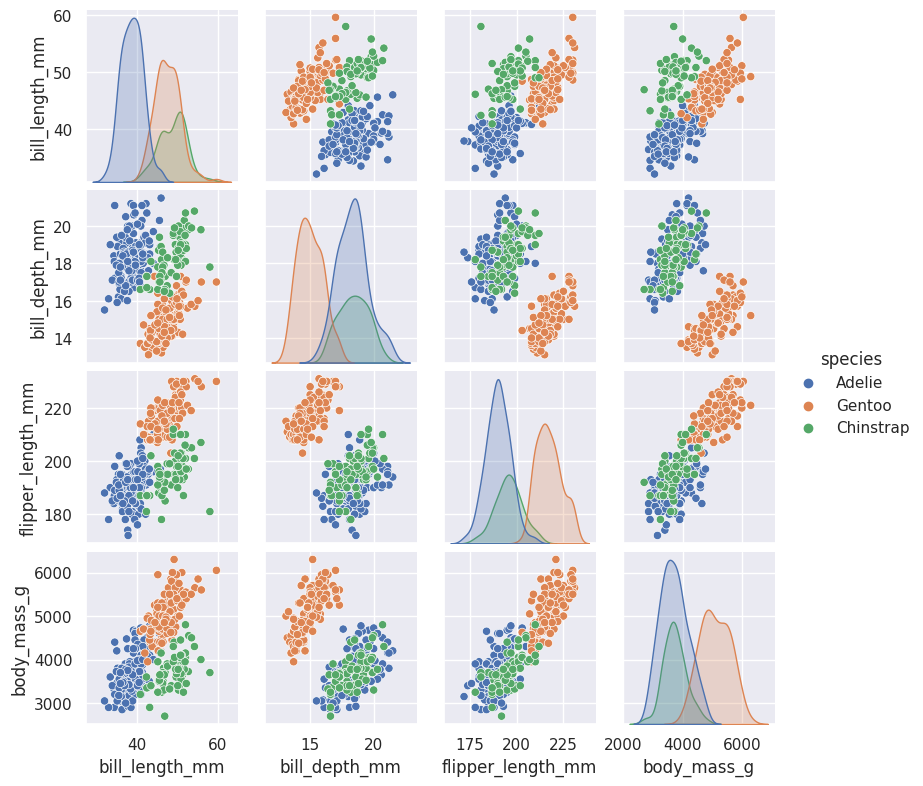

In [5]:
sns.set()
sns.pairplot(penguins, hue='species', height=2);

Para fines didácticos, simplificaremos el problema. 

- Unimos las categorías *'Adelie'* y *'Chinstrap'* en la clase *'adel_chins'*
- Además, usaremos datos estandarizados (más adelante, retomaremos éste concepto)

In [6]:
spec2 = penguins['species'].copy()
spec2[spec2.eq('Adelie') | spec2.eq('Chinstrap')] = 'adel_chins'
penguins['species'] = spec2
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,adel_chins,Torgersen,39.1,18.7,181.0,3750.0,male
1,adel_chins,Torgersen,39.5,17.4,186.0,3800.0,female
2,adel_chins,Torgersen,40.3,18.0,195.0,3250.0,female
4,adel_chins,Torgersen,36.7,19.3,193.0,3450.0,female
5,adel_chins,Torgersen,39.3,20.6,190.0,3650.0,male
...,...,...,...,...,...,...,...
339,adel_chins,Dream,55.8,19.8,207.0,4000.0,male
340,adel_chins,Dream,43.5,18.1,202.0,3400.0,female
341,adel_chins,Dream,49.6,18.2,193.0,3775.0,male
342,adel_chins,Dream,50.8,19.0,210.0,4100.0,male


In [7]:
from sklearn.preprocessing import StandardScaler

col_vars = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
x_peng = penguins[col_vars]

ss = StandardScaler()
scaled_x = ss.fit_transform(x_peng)
scaled_x = pd.DataFrame(ss.fit_transform(x_peng), columns=col_vars, index = penguins.index)
penguins_sc = pd.concat([scaled_x, penguins['species']], axis=1)

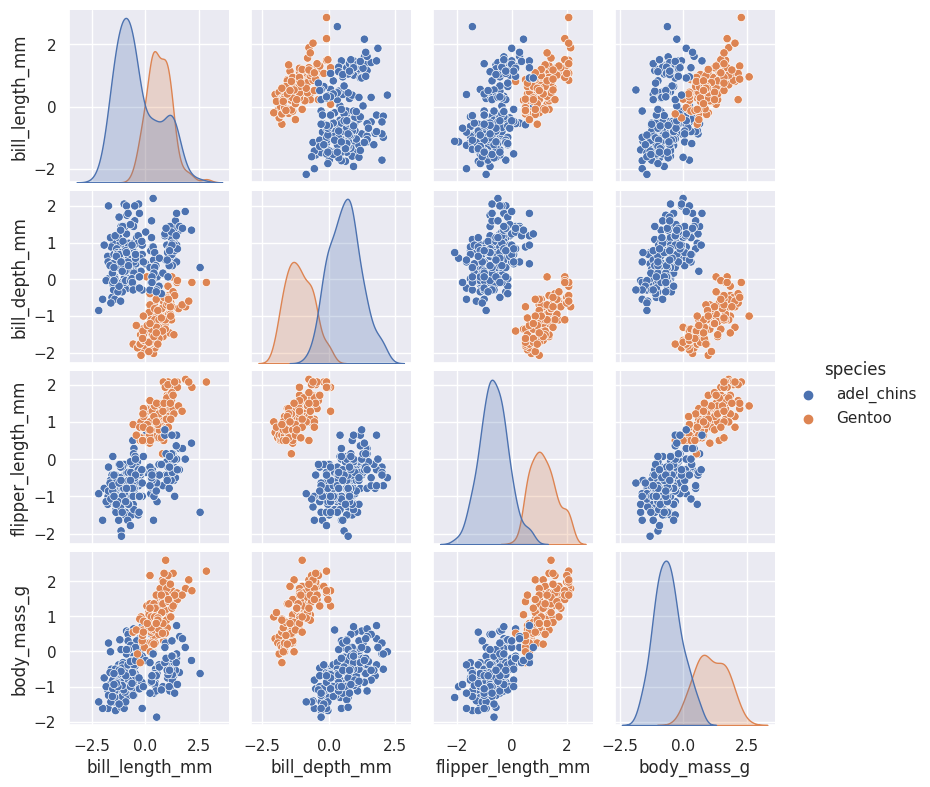

In [8]:
sns.pairplot(penguins_sc, hue='species', height=2);

Nuevamente, tenemos un problema de aprendizaje no supervisado. Podemos identificar claramente al menos 2 grupos


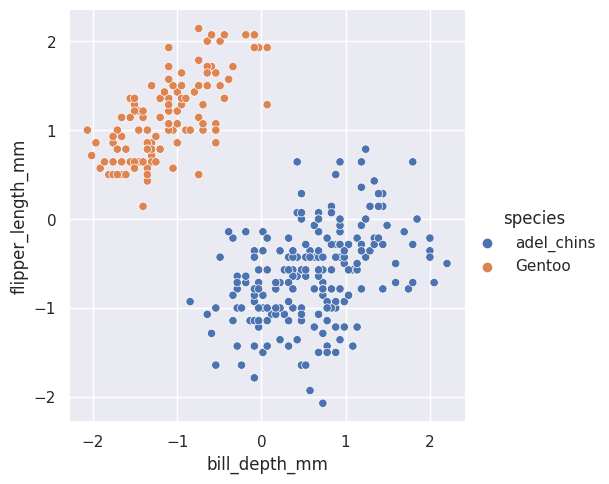

In [10]:
sns.relplot(x='bill_depth_mm', y='flipper_length_mm', hue='species', data=penguins_sc, height=5);

**Aprendizaje Supervisado**: aparece un dato nuevo y queremos saber a qué categoría pertenece

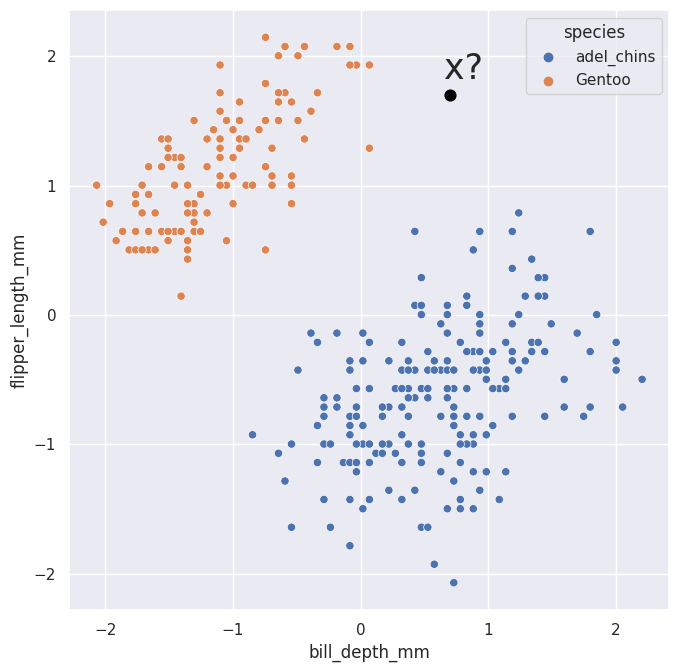

In [13]:
import matplotlib.pyplot as plt

new_x = [.7, 1.7]
fig = plt.figure(figsize = (6,6))
ax=fig.add_axes([0,0,1,1])
sns.scatterplot(x='bill_depth_mm', y='flipper_length_mm', hue='species', data=penguins_sc)
ax.scatter(x=new_x[0], y=new_x[1], color='black', s=60)
ax.text(new_x[0]-.13, new_x[1]+.12, ' x?', fontsize = 25);

¿Qué clase le asignarías? ¿Porqué?

Con lo que sabes o has aprendido hasta ahora, ¿se te ocurre algún método para estimar la clase del pinguino?

Tenemos entonces un conjunto de entrenamiento:

\begin{equation*}
(\mathbf{x}_1,y_1), \ldots ,(\mathbf{x}_n,y_n); \quad \mathbf{x} \in \mathbb{R}^2, y \in \left\lbrace -1,1 \right\rbrace
\end{equation*}

Queremos una función
\begin{equation*}
f:\mathbb{R}^2 \mapsto \left\lbrace -1,1 \right \rbrace
\end{equation*}

que nos responda la pregunta: ¿$\mathbf{x}_{new}$ es similar a Gentoo (-1) o a Adelie-Chinstrap ($+1$)?

Una solución basado en la distancia como medida de similaridad.

Usaremos un criterio basado en el vecino más cercano, pero en este caso, vamos a "*resumir*" los puntos de ambas categorías en solo 2 vecinos:

$\mathbf{c}_+ = \frac{1}{n_+} \sum_{i|y_i=1}\mathbf{x}_i$ 

y 

$\mathbf{c}_- = \frac{1}{n_-} \sum_{i|y_i=-1}\mathbf{x}_i$


In [14]:
x_gent = np.array(penguins_sc.loc[penguins_sc['species']=='Gentoo',['bill_depth_mm', 'flipper_length_mm']])
x_adel_chins = np.array(penguins_sc.loc[penguins_sc['species']!='Gentoo',['bill_depth_mm', 'flipper_length_mm']])
x_means = np.vstack((x_gent.mean(axis=0),x_adel_chins.mean(axis=0)))
all_mean = x_means.mean(axis=0)

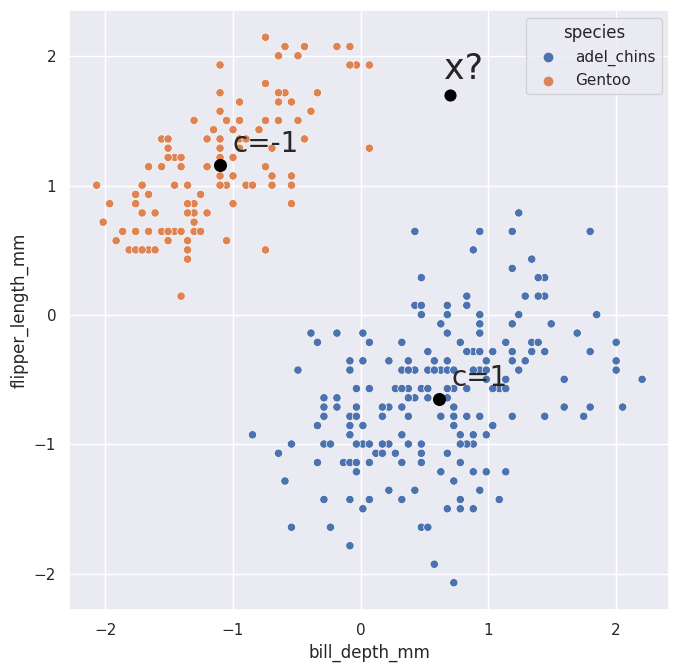

In [15]:
ax.scatter(x_means[:,0], x_means[:,1], color='black', s=70)
for i in range(0,x_means.shape[0]):
    ax.text(x_means[i,0]+.1, x_means[i,1]+.1, 'c='+str(round(2*i-1)), fontsize = 20)
fig

Entonces, nos interesa saber si

¿$\|\mathbf{c}_- - \mathbf{x} \|^2 > \|\mathbf{c}_+ - \mathbf{x} \|^2$ ?

equivalente a

¿$\|\mathbf{c}_-\|^2 - \|\mathbf{c}_+\|^2 + 2\langle\mathbf{x},\mathbf{c}_+\rangle - 2\langle\mathbf{x},\mathbf{c}_-\rangle > 0$?

Construimos un clasificador muy sencillo, para esto, define

$\mathbf{c}=(\mathbf{c}_+ - \mathbf{c}_-)/2$, 

$\qquad \mathbf{w}=\mathbf{c}_+ - \mathbf{c}_-$

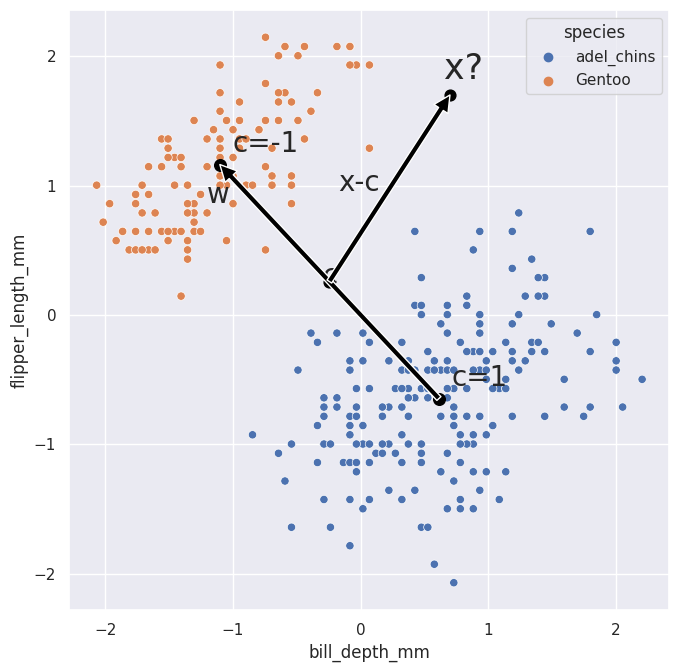

In [16]:
w = x_adel_chins.mean(axis=0)-x_gent.mean(axis=0)
ax.scatter(all_mean[0], all_mean[1], color='black', s=60)
ax.text(all_mean[0]-.05, all_mean[1]-.02, 'c', fontsize = 20)
ax.annotate('',xy = (x_means[0,0], x_means[0,1]), xytext = (x_means[1,0], x_means[1,1]),
               arrowprops=dict(facecolor='black'))
ax.text(x_means[0,0]-.1, x_means[0,1]-.3, 'w', fontsize = 20)
ax.annotate('',xy = (new_x[0], new_x[1]), xytext = (all_mean[0], all_mean[1]),
               arrowprops=dict(facecolor='black'))
ax.text(all_mean[0]+.07, all_mean[1]+.7, 'x-c', fontsize = 20)
fig

Lo anterior, induce un modelo lineal de clasificación:

$w_0+\mathbf{w}'\mathbf{x}$.

Entonces, podemos clasificar mediante

$y=\textrm{sign}\langle(\mathbf{x}-\mathbf{c}),\mathbf{w}\rangle$

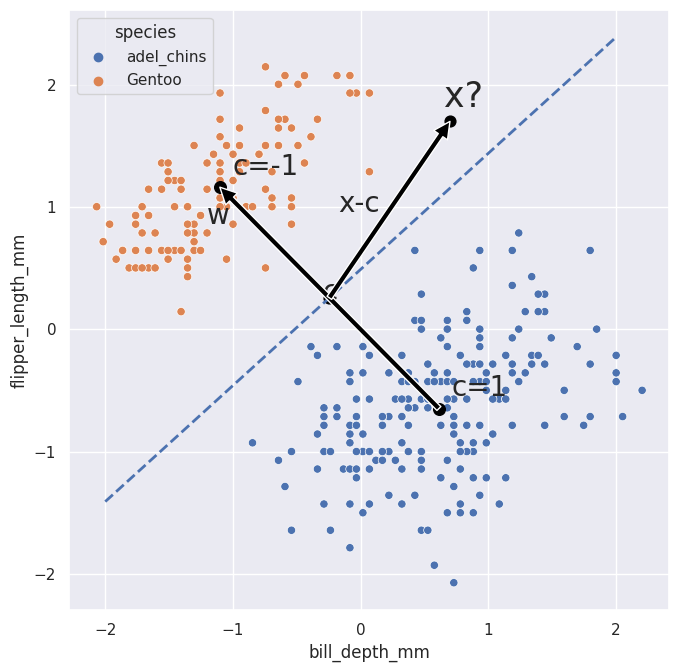

In [17]:
cg = x_gent.mean(axis=0)
cac = x_adel_chins.mean(axis=0)
w = cac-cg
w0 = (np.dot(cg,cg)-np.dot(cac,cac))*.5
xx1 = np.linspace(-2,2,100)
xx2 = -(w[0]*xx1+w0)/w[1]
ax.plot([xx1[0],xx1[99]],[xx2[0],xx2[99]],linestyle='--', linewidth=2)
fig

Obviamente, ésta solución no es la mejor opción. 

Por ejemplo, ¿qué pasa si tenemos outliers?

### Ejemplo 2: OTUS

In [23]:
#!pip install contextily
#!pip install geopandas

In [25]:
from google.colab import drive
import os
drive.mount('/content/drive/')

Mounted at /content/drive/


In [27]:
os.chdir('/content/drive/My Drive/Cursos/metagenomica/Notebooks/')
!pwd

/content/drive/My Drive/Cursos/metagenomica/Notebooks


In [28]:
import contextily as ctx
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pandas as pd 
import seaborn as sns

In [29]:
otus = pd.read_csv("../data/OTUS_conservados.csv", index_col="X")
otus.head()

,New_Labels,Latitude,Longitude,X4457032,X4471583,X9560,X4468101,X198079,X101868,X4360511,...,X210657,X218246,X48487,X81081,X1787355,X6159,X154268,X855996,X99400,X716037
X,,,,,,,,,,,,,,,,,,,,,
1001.skm3,WarmT-SumDry-HotSum0,33.194,-117.241,0.003306,0.0,0.0,0.0,0.0,0.005785,0.00000,...,0.0,0.00000,0.004752,0.007231,0.000000,0.0,0.0,0.002273,0.00000,0.00000
1001.skd3,WarmT-SumDry-HotSum0,33.194,-117.241,0.002699,0.0,0.0,0.0,0.0,0.001080,0.00018,...,0.0,0.00000,0.003419,0.029872,0.000180,0.0,0.0,0.000720,0.00000,0.00000
1001.skm1,WarmT-SumDry-HotSum0,33.194,-117.241,0.001304,0.0,0.0,0.0,0.0,0.002934,0.00000,...,0.0,0.00000,0.004563,0.004563,0.000326,0.0,0.0,0.001304,0.00000,0.00000
1001.skb3,WarmT-SumDry-HotSum0,33.194,-117.241,0.009130,0.0,0.0,0.0,0.0,0.004966,0.00000,...,0.0,0.00016,0.004645,0.008169,0.000961,0.0,0.0,0.002243,0.00016,0.00032
1001.skm2,WarmT-SumDry-HotSum0,33.194,-117.241,0.001022,0.0,0.0,0.0,0.0,0.000341,0.00000,...,0.0,0.00000,0.005112,0.010907,0.000682,0.0,0.0,0.002045,0.00000,0.00000


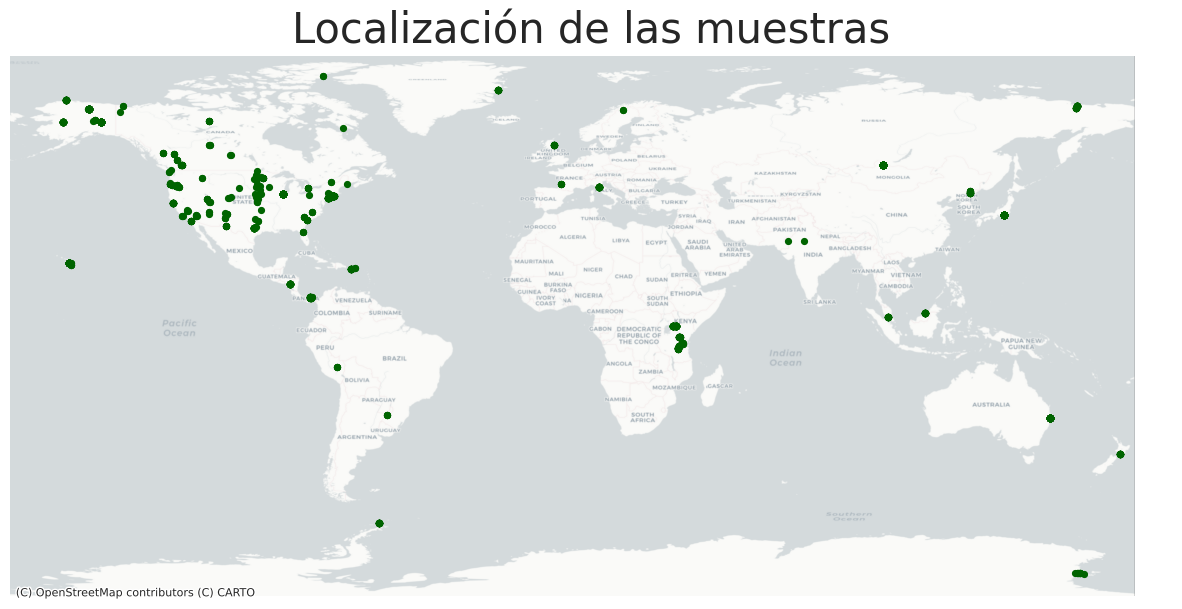

In [31]:
otus_gdf = gpd.GeoDataFrame(otus.copy(), geometry=gpd.points_from_xy(otus['Longitude'], otus['Latitude']), crs='EPSG:4326')

fig, ax = plt.subplots(1, figsize=(15, 15))
otus_gdf.plot(marker='.', c='darkgreen', ax=ax, markersize=70, zorder=1)
plt.title("Localización de las muestras",fontsize=30)
plt.axis("off")

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, crs='EPSG:4326')

In [32]:
cont_names = list(otus.drop(["New_Labels","Latitude", "Longitude"], axis=1).columns)
y_names = ["New_Labels"]
train_df = otus[cont_names+y_names]
train_df

,X4457032,X4471583,X9560,X4468101,X198079,X101868,X4360511,X9961,X3944484,X1105039,...,X218246,X48487,X81081,X1787355,X6159,X154268,X855996,X99400,X716037,New_Labels
X,,,,,,,,,,,,,,,,,,,,,
1001.skm3,0.003306,0.000000,0.0,0.000000,0.0,0.005785,0.000000,0.0,0.000000,0.000000,...,0.00000,0.004752,0.007231,0.000000,0.000000,0.0,0.002273,0.000000,0.00000,WarmT-SumDry-HotSum0
1001.skd3,0.002699,0.000000,0.0,0.000000,0.0,0.001080,0.000180,0.0,0.000000,0.000000,...,0.00000,0.003419,0.029872,0.000180,0.000000,0.0,0.000720,0.000000,0.00000,WarmT-SumDry-HotSum0
1001.skm1,0.001304,0.000000,0.0,0.000000,0.0,0.002934,0.000000,0.0,0.000000,0.000000,...,0.00000,0.004563,0.004563,0.000326,0.000000,0.0,0.001304,0.000000,0.00000,WarmT-SumDry-HotSum0
1001.skb3,0.009130,0.000000,0.0,0.000000,0.0,0.004966,0.000000,0.0,0.000000,0.000000,...,0.00016,0.004645,0.008169,0.000961,0.000000,0.0,0.002243,0.000160,0.00032,WarmT-SumDry-HotSum0
1001.skm2,0.001022,0.000000,0.0,0.000000,0.0,0.000341,0.000000,0.0,0.000000,0.000000,...,0.00000,0.005112,0.010907,0.000682,0.000000,0.0,0.002045,0.000000,0.00000,WarmT-SumDry-HotSum0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1883.2011.282.crump.artic.ltreb.main.lane4.noindex,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000028,0.0,0.000028,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.006404,0.0,0.000000,0.001601,0.00000,Snow-FullH-CoolSum8
1883.2011.329.crump.artic.ltreb.main.lane4.noindex,0.000110,0.000000,0.0,0.000028,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000248,0.00000,Snow-FullH-CoolSum8
1883.2011.348.crump.artic.ltreb.main.lane4.noindex,0.000528,0.000024,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000312,...,0.00000,0.000000,0.000000,0.000000,0.000024,0.0,0.000000,0.000744,0.00000,Snow-FullH-CoolSum8


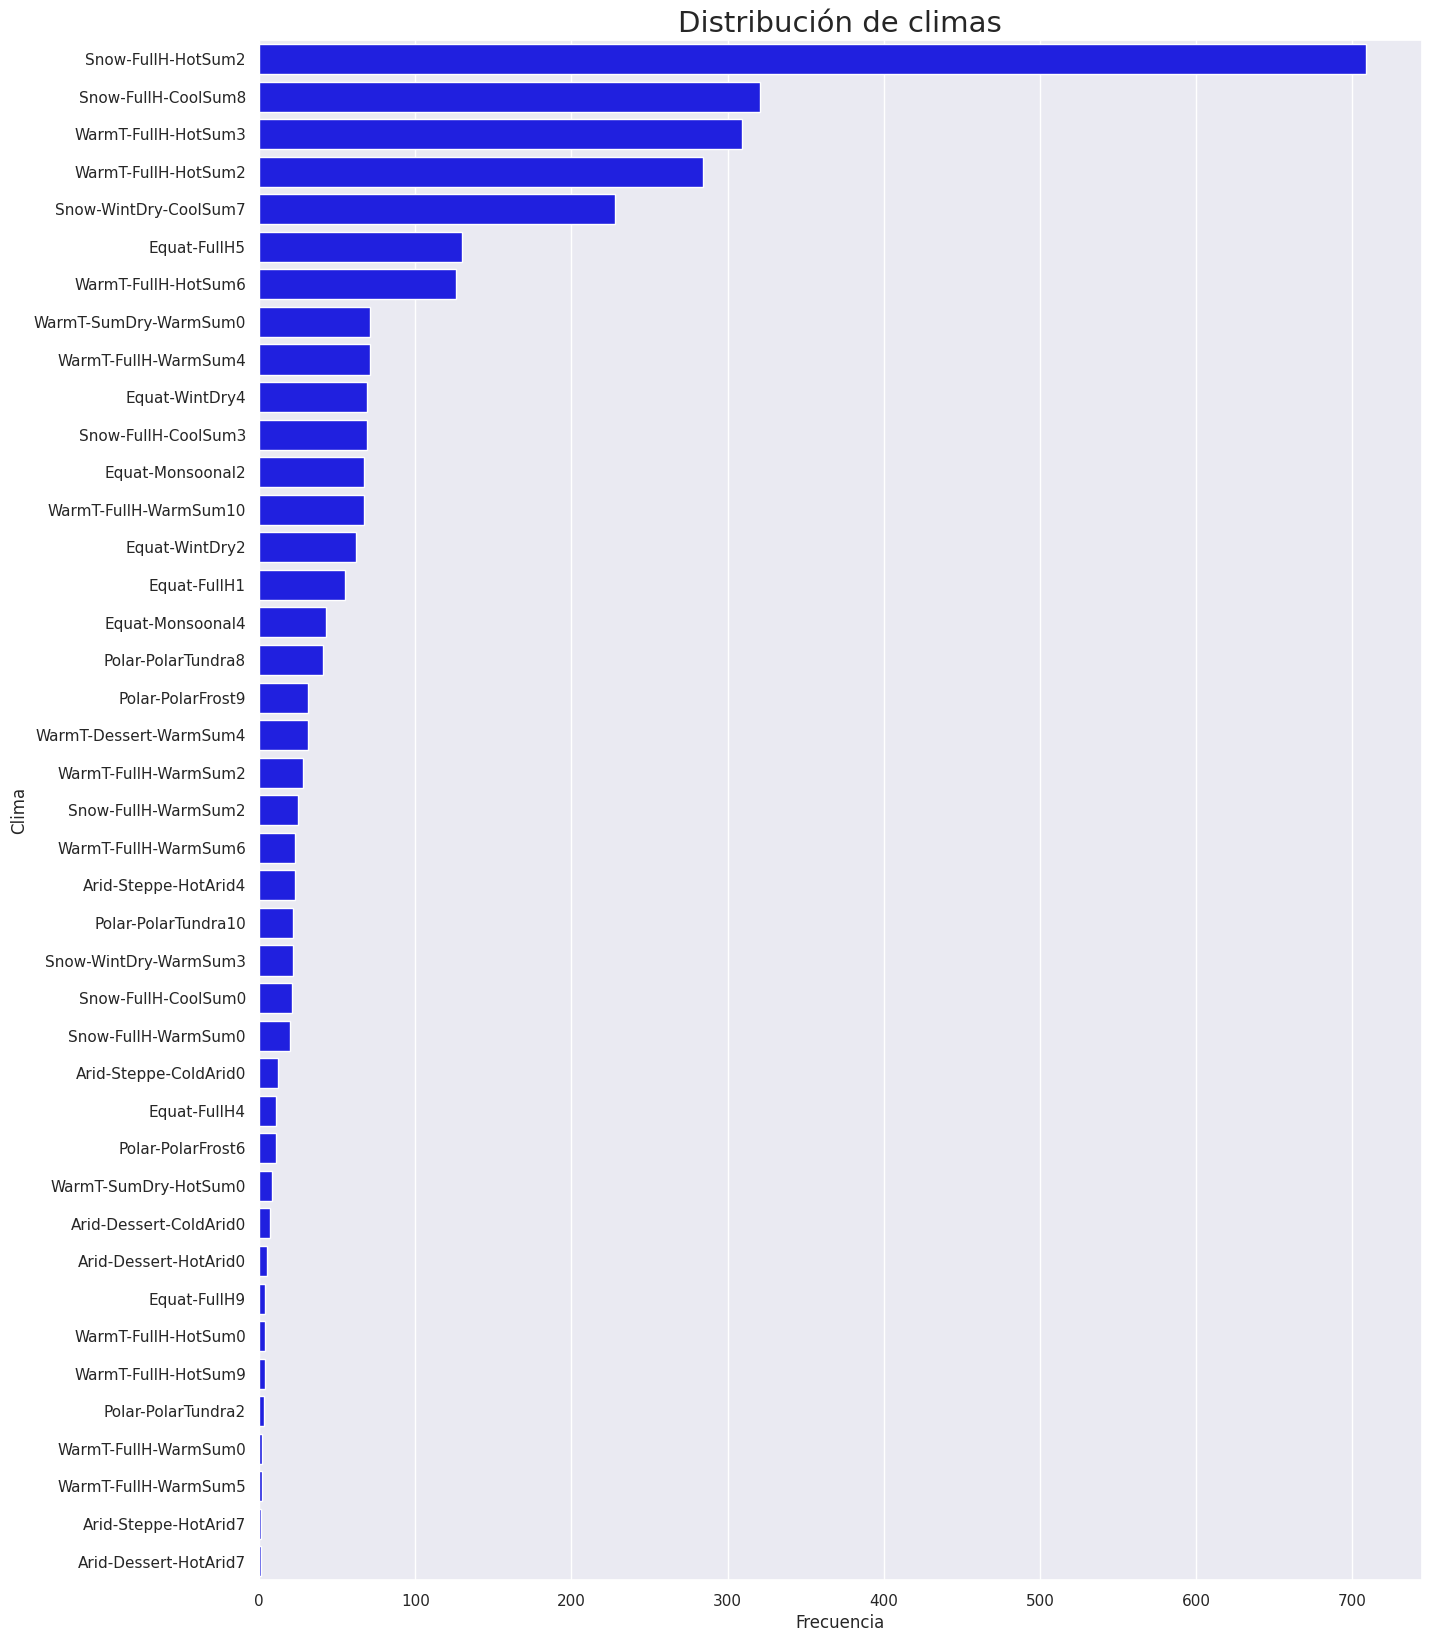

In [33]:
fig, ax = plt.subplots(1,1 ,figsize=(15, 20))
sns.countplot(data=train_df, y="New_Labels", order=train_df.New_Labels.value_counts().index, color="blue")
plt.xlabel("Frecuencia")
plt.ylabel("Clima")
plt.title("Distribución de climas", fontsize=21)
plt.show()

In [34]:
y = np.array(train_df[y_names]).ravel()
X = np.array(train_df.drop(y_names,axis=1)).astype('float')

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.express as px

X_std = StandardScaler().fit_transform(X)
ncomp=3
otus_pca=PCA(ncomp)
otus_pca.fit_transform(X_std) 
proj = pd.DataFrame(otus_pca.transform(X_std),columns = ['pc1','pc2','pc3'])
pca_proj = pd.DataFrame({'pc1': proj['pc1'], 'pc2': proj['pc2'], 'clima': y})

# Grafica interactiva
fig = px.scatter(pca_proj, x='pc1', y='pc2', hover_data=['clima'], color = 'clima')
fig.update_layout(
    autosize=False,
    width=600,
    height=600,
)
fig.show()

In [37]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=50)
#X_tsne = tsne.fit_transform(train_img)
#tsne_dataset = pd.DataFrame({'pc1': X_tsne[:, 0], 'pc2': X_tsne[:, 1], 'digit': y_train})
X_tsne = tsne.fit_transform(X_std)

tsne_dataset = pd.DataFrame({'pc1': X_tsne[:, 0], 'pc2': X_tsne[:, 1], 'clima': y})

In [38]:
# Grafica interactiva
fig = px.scatter(tsne_dataset, x='pc1', y='pc2', hover_data=['clima'], color = 'clima')
fig.update_layout(
    autosize=False,
    width=800,
    height=800,
)
fig.show()


Entonces, nuestro esquema de aprendizaje máquina revisitado es:

![figure](https://drive.google.com/uc?export=view&id=1jKJOTjDTNPWCjzJN9IO-c_gF2ZKadIF0)
